In [11]:
import csv
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn import cross_validation as cv
import pandas as pd
%matplotlib inline

regex1 = r"\d+"
regex2 = r"c\d+"
X = np.zeros((10000,1000)) #1.000x10.000 matrix


In [12]:
#load data
with open("data_train.csv") as csvfile:
	readCSV = csv.reader(csvfile,delimiter=',')
	next(readCSV) #discard header
	for row in readCSV:
		match = re.search(regex1,row[0])
		match2 = re.search(regex2,row[0])
		row_i = int(match.group(0))-1
		col_i = int(match2.group(0)[1:]) -1
		X[row_i,col_i] = int(row[1])

In [13]:
train_data, test_data = cv.train_test_split(X,test_size=0.25)

train_data = X[:7500]
test_data = X[7500:]

M,N = X.shape
R = np.zeros((10000, 1000))
for i in range(train_data.shape[0]):
    for j in range(train_data.shape[1]):
        R[i,j] = train_data[i,j]

shift = int(10000*(1-0.25))
print(shift)
T = np.zeros((10000, 1000))
for i in range(test_data.shape[0]):
    for j in range(test_data.shape[1]):
        T[i+shift,j] = test_data[i,j]

I = R.copy()
I[I > 0] = 1
I[I == 0] = 0
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

7500


In [14]:
def prediction(U,Z):
    return np.dot(U.T,Z)

In [15]:
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R > 0]))

In [16]:
train_errors = []
test_errors = []

In [17]:
K = 50
U = np.random.rand(K,M)
Z = np.random.rand(K,N)
n_epochs = 10
lmda = 0.00001
gamma = 0.0001


In [ ]:
#DO SGD
users,movies = R.nonzero()
print(users.shape)
print(movies.shape)


(851409,)
(851409,)


In [ ]:
for epoch in range(n_epochs):
    for u, i in zip(users,movies):
        e = R[u, i] - prediction(U[:,u],Z[:,i])
        U[:,u] += gamma * ( e * Z[:,i] - lmda*U[:,u] )
        Z[:,i] += gamma * ( e * U[:,u] - lmda*Z[:,i] )
    train_rmse = rmse(I,R,Z,U) # Calculate root mean squared error from train dataset
    test_rmse = rmse(I2,T,Z,U) # Calculate root mean squared error from test dataset
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

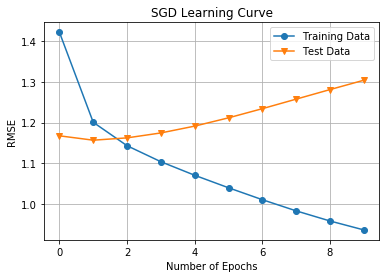

In [10]:
plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), test_errors, marker='v', label='Test Data');
plt.title('SGD Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
#now lets predict the data from samplesubmission
fout = open('mysubmission.csv', 'w')
fout.write("Id,Prediction\n")
with open("SampleSubmission.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        calc = prediction(U[:,row_i], Z[:,col_i])
        print(calc)
        fout.write(row[0]+","+str(calc)+"\n")
    fout.close()